<a href="https://colab.research.google.com/github/priyanshgupta1998/Natural-language-processing-NLP-/blob/master/MyWays_Assignment/Sentence_Clustering_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#myWay  Assignment

##import libraries to access the data from kaggle

In [2]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
#Downlaod dataset
!kaggle datasets download -d paultimothymooney/mueller-report

 96% 119M/124M [00:01<00:00, 88.0MB/s]
100% 124M/124M [00:01<00:00, 112MB/s] 


In [4]:
!unzip mueller-report.zip

Archive:  mueller-report.zip
  inflating: mueller_report.csv      
  inflating: muellerreport.pdf       


#Read  CSV file

In [107]:
import pandas as pd
data = pd.read_csv('mueller_report.csv')
print(data.shape)
data.head()

(19195, 3)


,page,line,text
0,1,1,U.S. Department of Justice
1,1,2,"AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiA"
2,1,3,Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)
3,1,4,Report On The Investigation Into
4,1,5,Russian InterferenceIn The


In [82]:
df = data.copy()
df[df['page']==1]

,page,line,text
0,1,1,U.S. Department of Justice
1,1,2,"AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiA"
2,1,3,Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)
3,1,4,Report On The Investigation Into
4,1,5,Russian InterferenceIn The
5,1,6,2016 PresidentialElection
6,1,7,Volume I of II
7,1,8,"Special Counsel Robert S. Mueller, III"
8,1,9,Submitted Pursuant to 28 C.F.R. § 600.8(c)
9,1,10,"Washington, D.C."


In [41]:

app = []
for i in range(len(df[df['page']==2])):
  app+=[list(df[df['page']==2]['text'])[i]]

app

['U.S. Department of Justice',
 'Atl6rney W6rk Pr6d1:1et// May C6ntain MEtterial Pr6teeted Under Fed . R. Criffl. P. 6(e)',
 nan]

In [17]:
print('total unique pages OR total number of pages : ' , data['page'].nunique())  
data['page'].value_counts()   

total unique pages OR total number of pages :  448


329    59
250    57
100    57
249    57
247    57
       ..
440     3
8       3
396     3
416     3
2       3
Name: page, Length: 448, dtype: int64

In [108]:
data_page= data.groupby('page')['text'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', '').reset_index()
print(data_page.shape)
data_page.head()

(448, 2)


,page,text
0,1,U.S. Department of Justi...
1,2,U.S. Department of Jus...
2,3,U.S. Department of Jus...
3,4,U.S. Department of Jus...
4,5,U.S. Department of Jus...


In [0]:
# from nltk.tokenize import sent_tokenize
# text = data_page['text'][0]
# print(len(sent_tokenize(text)), sent_tokenize(text))

In [56]:
data_page['text'][0].strip()

"U.S. Department of Justice    AttarAe:,c\\\\'erlc Predtiet // Mtt; CeA1:ttiA Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)                Report On The Investigation Into                      Russian InterferenceIn The                       2016 PresidentialElection                                  Volume I of II          Special Counsel Robert S. Mueller, III      Submitted Pursuant to 28 C.F.R. § 600.8(c)                                Washington, D.C.                                      March 2019                                             NaN"

In [109]:
# Transform string data and remove punctuation
import string
punc = string.punctuation
print(punc)
import re
match ='''!"#$%&'()*+-/;<=>?@[\]^_`{|}~'''
print(match)
data_page['text'] = data_page.text.apply(lambda x: x.lower()) # make all the character lower form
data_page['text'] = data_page.text.apply(lambda x: ''.join([c for c in x if c not in punc]))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&'()*+-/;<=>?@[\]^_`{|}~


In [58]:
data_page['text'][0].strip()

'US Department of Justice    AttarAecerlc Predtiet  Mtt CeA1ttiA Ma1ertalPrn1eetedUAder Fed R Crhtt P 6e                Report On The Investigation Into                      Russian InterferenceIn The                       2016 PresidentialElection                                  Volume I of II          Special Counsel Robert S Mueller III      Submitted Pursuant to 28 CFR § 6008c                                Washington DC                                      March 2019                                             NaN'

In [110]:
#stopwords and tokenizations
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#making the stopword set from basic english and the given list of stopwords'
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopset = set(w.upper() for w in stopwords.words('english'))
#adding more stopwords from text file of stopwords
import glob
path = "StopWords*.txt"   # Additional stopwords 
glob.glob(path)
for filename in glob.glob(path):
    with open(filename, 'r') as f:
        text = f.read()
        text = re.sub(r"\s+\|\s+[\w]*" , "", text)        
        stopset.update(text.upper().split())

data_page['text'] = data_page.text.apply(lambda x: word_tokenize(x))

data_page['text'] = data_page.text.apply(lambda x: [w for w in x if w not in stopset])
data_page['text'] = data_page.text.apply(lambda x: [w for w in x if(len(str(w))>3)])
data_page['text'] = data_page.text.apply(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [111]:
data_page['text'][0]

'department justice attaraecerlc predtiet cea1ttia ma1ertalprn1eeteduader crhtt report investigation into russian interferencein 2016 presidentialelection volume special counsel robert mueller submitted pursuant 6008c washington march 2019'

In [0]:
import re
def clean_text(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"nan", " ", text)
    text = re.sub(r"name", " ", text)
    text = re.sub(r"dtype", " ", text)
    text = re.sub(r"object", " ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
data_page['text'] = data_page['text'].map(lambda com : clean_text(com))

In [113]:
data_page['text'][0]

'department justice attaraecerlc predtiet cea1ttia ma1ertalprn1eeteduader crhtt report investigation into russian interferencein 2016 presidentialelection volume special counsel robert mueller submitted pursuant 6008c washington march 2019'

In [0]:
data_page['split'] = data_page['text'].map(lambda com : com.split())

In [136]:
for i in range(2):
  print(data_page['split'][i])

['department', 'justice', 'attaraecerlc', 'predtiet', 'cea1ttia', 'ma1ertalprn1eeteduader', 'crhtt', 'report', 'investigation', 'into', 'russian', 'interferencein', '2016', 'presidentialelection', 'volume', 'special', 'counsel', 'robert', 'mueller', 'submitted', 'pursuant', '6008c', 'washington', 'march', '2019']
['department', 'justice', 'atl6rney', 'w6rk', 'pr6d11et', 'c6ntain', 'metteria']


In [137]:

from gensim.models import Word2Vec
sentences = list(data_page['split'])
m = Word2Vec(sentences , size=50  , min_count = 1 , sg = 1)
def vectorizer(sent , m):
    vec = []
    numw = 0
    for w in sent:
    	try:
    		if(numw==0):
    			vec = m[w]
    		else:
    			vec = np.add(vec , m[w])
    		numw+=1
    	except:
    		pass
    return np.asarray(vec)/numw

l =[]
for i in sentences:
	l.append(vectorizer(i,m))
X = np.array(l)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


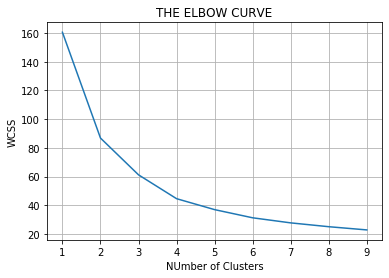

In [138]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1,10):
	kmeans = KMeans(n_clusters = i , init ='k-means++' , random_state=42)
	kmeans.fit(X)
	wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('THE ELBOW CURVE')
plt.xlabel('NUmber of Clusters')
plt.ylabel('WCSS')
plt.grid('on')
plt.show()

#we'll take k=3

In [139]:
n_clusters = 3
clf = KMeans(n_clusters = n_clusters,
				max_iter=100 ,
				init='k-means++',
				n_init=1)
labels = clf.fit_predict(X)
print(len(set(labels)) , labels)

3 [0 0 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 2 0 0 1 1 0 0 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 1 0 2 0 0 2 0 2 0 2 0 1 0 0 2 2 2 2 2 2 2 0 0 2 2 2 0 2 0 2 2 2 2 0 0 0 0
 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2
 2 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0
 0 0 1 0]


In [142]:
liss = []
for index , sentence in enumerate(sentences):
	# print(index , str(labels[index]) , " : " + str(sentence))
  liss.append(labels[index])
print(len(liss), type(liss[0]))
liss[:10]

448 <class 'numpy.int32'>


[0, 0, 0, 2, 2, 2, 2, 0, 2, 2]

In [144]:
data_page.drop('split' , axis=1 , inplace=True)
data_page.head()

,page,text
0,1,department justice attaraecerlc predtiet cea1t...
1,2,department justice atl6rney w6rk pr6d11et c6nt...
2,3,department justice attefflewerle predttet ceht...
3,4,department justice mterhey werk pretittet cell...
4,5,department justice wetk ptetlttet cehtttihmate...


In [156]:
data = pd.read_csv('mueller_report.csv')
data_page= data.groupby('page')['text'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', '').reset_index()
data_page['text'] = data_page['text'].map(lambda com : re.sub('\s+' ,' ', com.strip()))
data_page['Class']= liss
# print(data_page['text'].nunique())
data_page.head(30)

,page,text,Class
0,1,"U.S. Department of Justice AttarAe:,c\\'erlc P...",0
1,2,U.S. Department of Justice Atl6rney W6rk Pr6d1...,0
2,3,U.S. Department of Justice At:t:ef'fle)'Werle ...,0
3,4,U.S. Department of Justice MterHey Werk Pretit...,2
4,5,U.S. Department of Justice Wet'k Pt'etlttet /I...,2
5,6,U.S. Department of Justice Atten1e~· Werk Pred...,2
6,7,U.S. Department of Justice AtterAe~ \\' erk Pr...,2
7,8,U.S. Department of Justice A+terfl:eyWerk Prod...,0
8,9,U.S . Department of Justice Atten1e:y·'>lork P...,2
9,10,U.S. Department of Justice Atterttey Werk Pred...,2


In [0]:
data_page.to_csv('Output.csv' , index =False)

In [0]:
# for i in range(len(data_page)):
#   print(i, list(data_page['text'])[i])

In [0]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# import numpy as np
# import pandas as pd
# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(list(data_page['text']))
# true_k = 3
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# model.fit(X)
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#  print("Cluster %d:" % i),
#  for ind in order_centroids[i, :10]:
#   print("%s" % terms[ind])